In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd

from fedot_ind.core.architecture.postprocessing.cv_results_parser import *
from utils import *

ds_name = 'CIFAR10'
exp_root = '/media/n31v/data/results/' + ds_name

In [ ]:
create_mean_exps(exp_root)

In [2]:
exps = exp_list(ds_name)
svd_channel = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD spatial'],
    metric='f1'
)
sfp_energy = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP energy'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP percentage'],
    metric='f1'
)
best = get_best_metric(
    exp_path=exps['Baseline'],
    metric='f1'
)
print(f'best f1: {best:.3f}')

best f1: 0.694


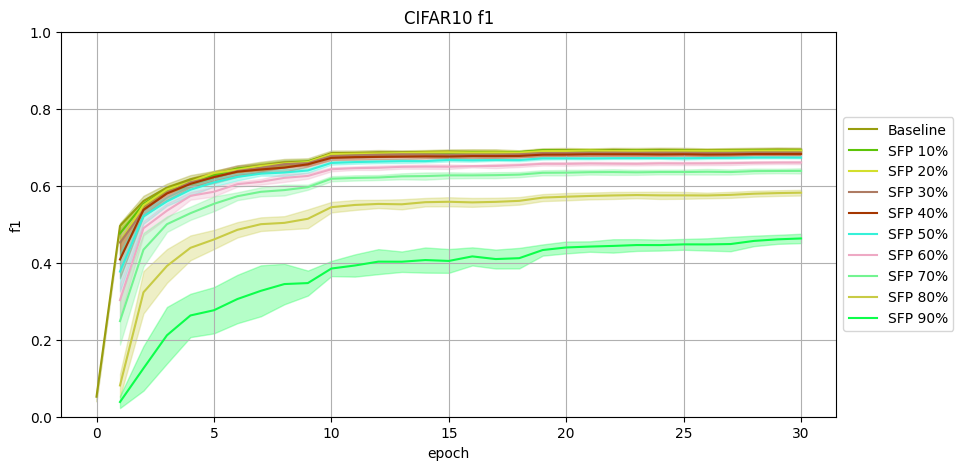

In [3]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP percentage'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

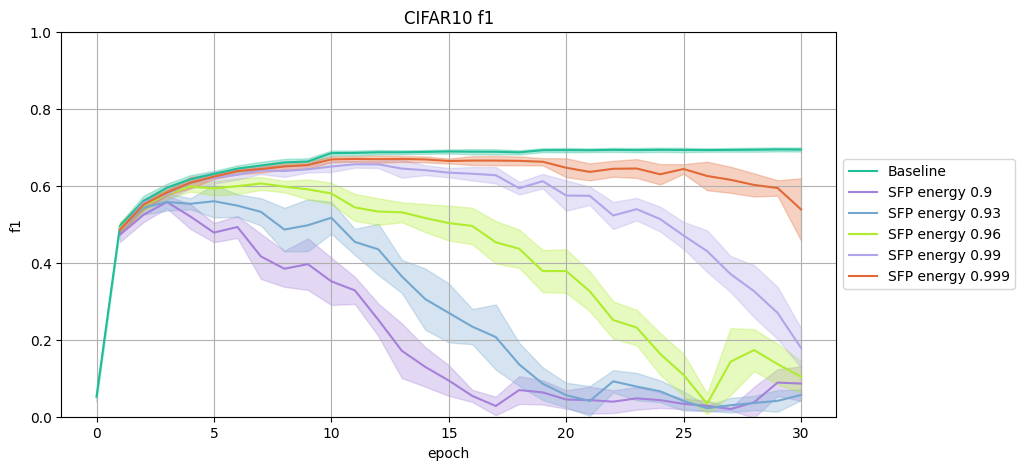

In [4]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP energy'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

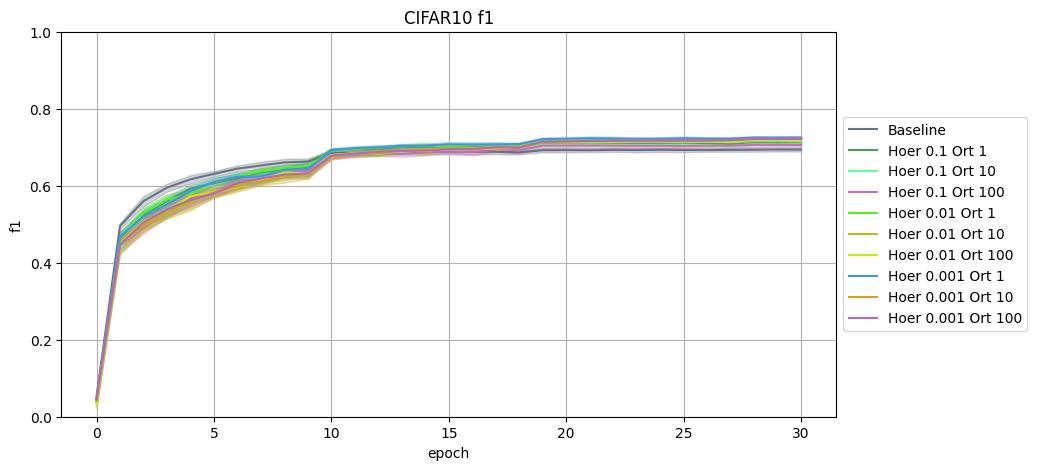

In [5]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD channel'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

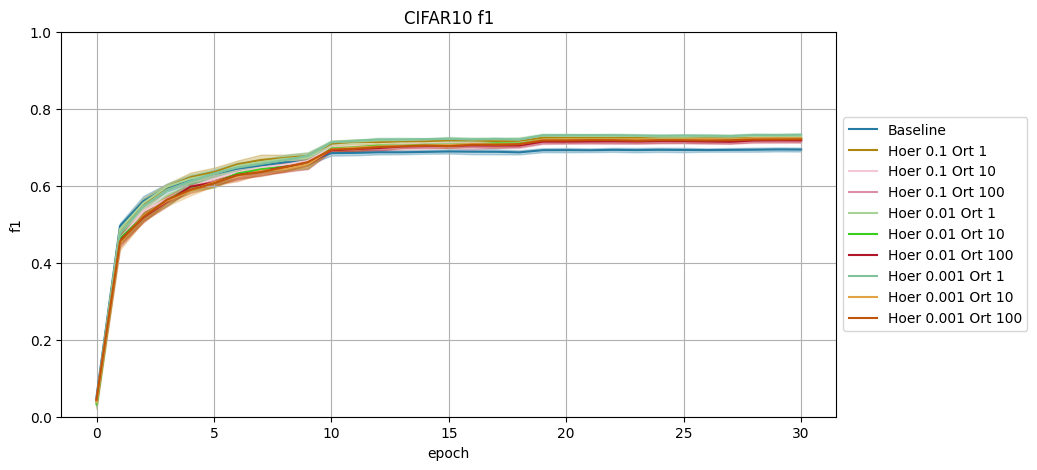

In [6]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD spatial'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

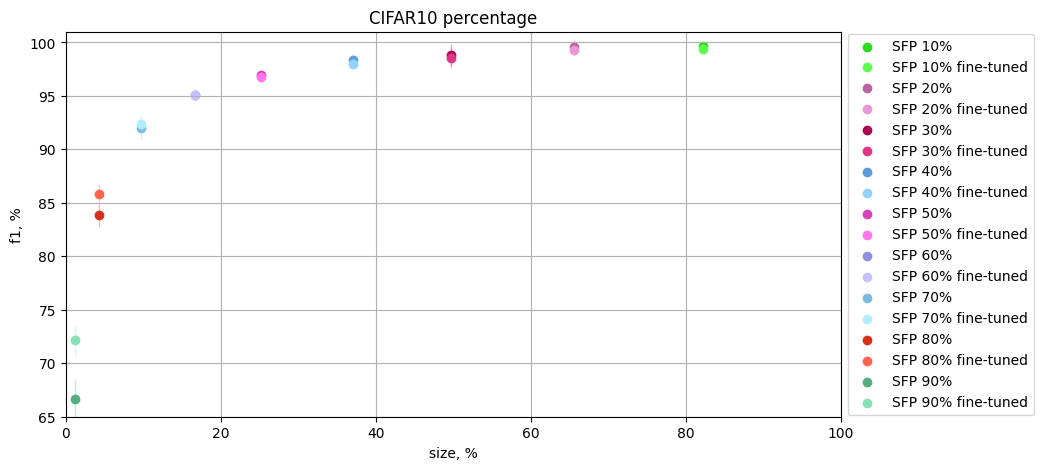

In [7]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(10, 5),
    title=f'{ds_name} percentage',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(65, 101),
    xlim=(0, 100)
)

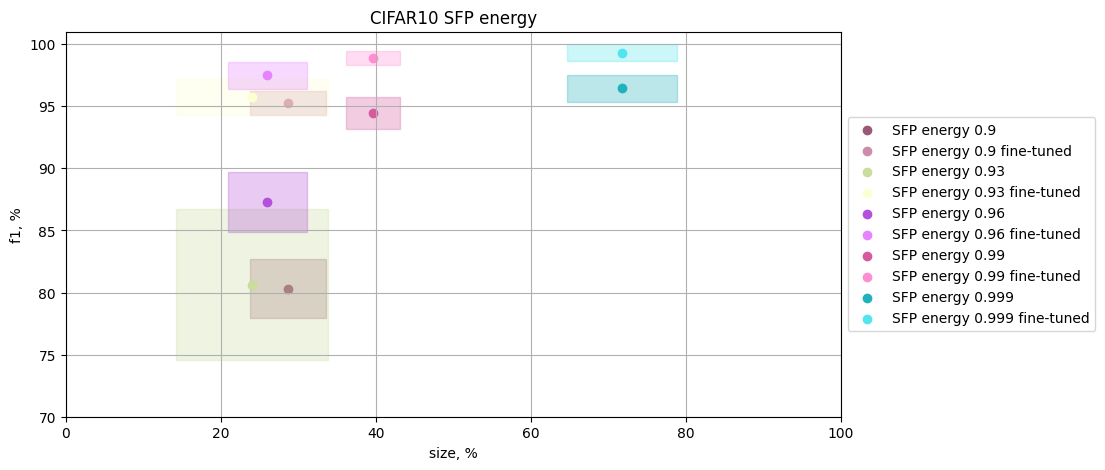

In [8]:
ax = show_sfp_results(
    sfp_exps=sfp_energy,
    figsize=(10, 5),
    title=f'{ds_name} SFP energy',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(70, 101),
    xlim=(0, 100)
)

In [9]:
channel_exps = {k: v for k, v in svd_channel.items() if 'Hoer 0.1' in k}

In [ ]:
channel_exps = {k: v for k, v in svd_channel.items() if k.endswith('Ort 10')}

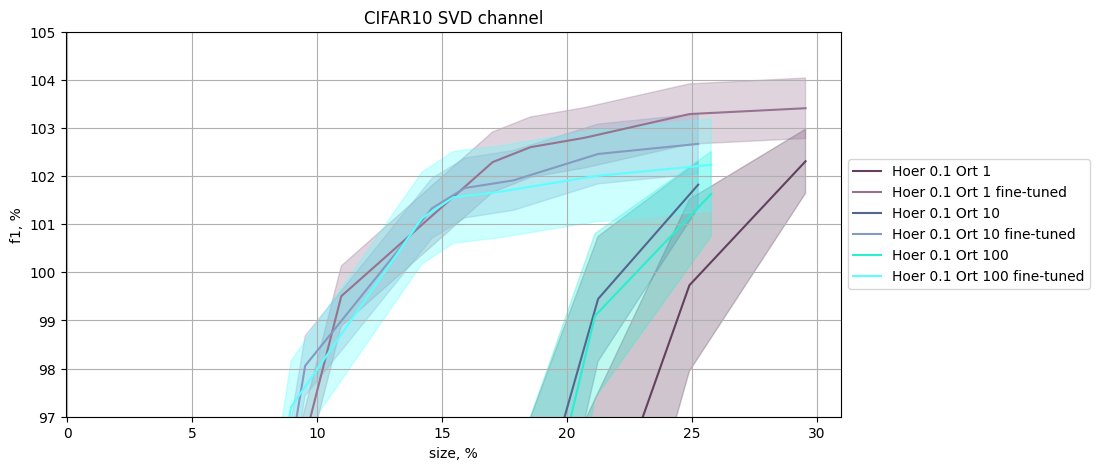

In [10]:
ax = show_svd_results(
    svd_exps=channel_exps,
    figsize=(10, 5),
    title=f'{ds_name} SVD channel',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(97, 105),
    # xlim=(0, 100)
)

In [11]:
spatial_exps = {k: v for k, v in svd_spatial.items() if 'Hoer 0.1' in k}

In [ ]:
spatial_exps = {k: v for k, v in svd_spatial.items() if k.endswith('Ort 10')}

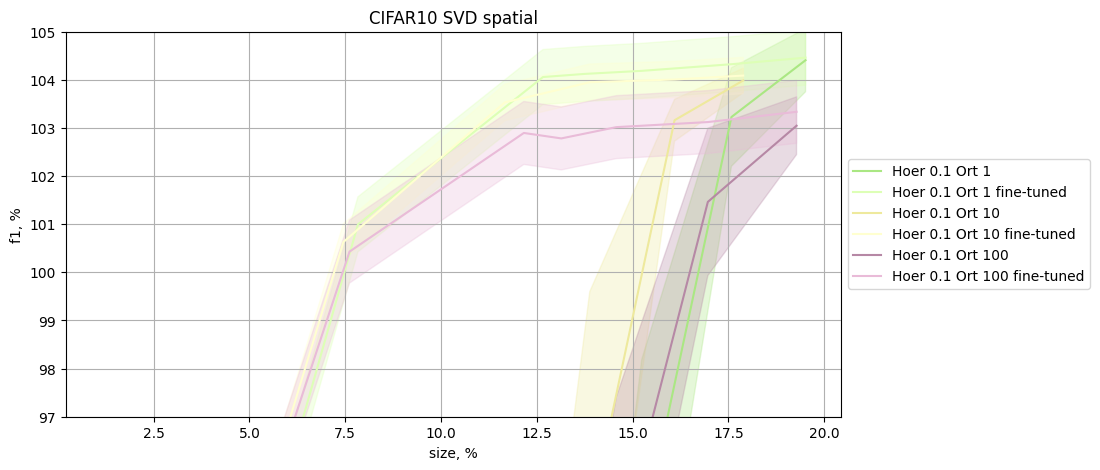

In [12]:
ax = show_svd_results(
    svd_exps=spatial_exps,
    figsize=(10, 5),
    title=f'{ds_name} SVD spatial',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(97, 105),
    # xlim=(0, 100)
)

In [3]:
best_svd = dict(channel='Hoer 0.1 Ort 1', spatial='Hoer 0.1 Ort 1')
best_channel = svd_channel[best_svd['channel']]
best_spatial = svd_spatial[best_svd['spatial']]
compare_dict = {
    "SFP percentage": sfp_per,
    "SFP energy": sfp_energy,
    "SVD channel": best_channel,
    "SVD spatial": best_spatial
}

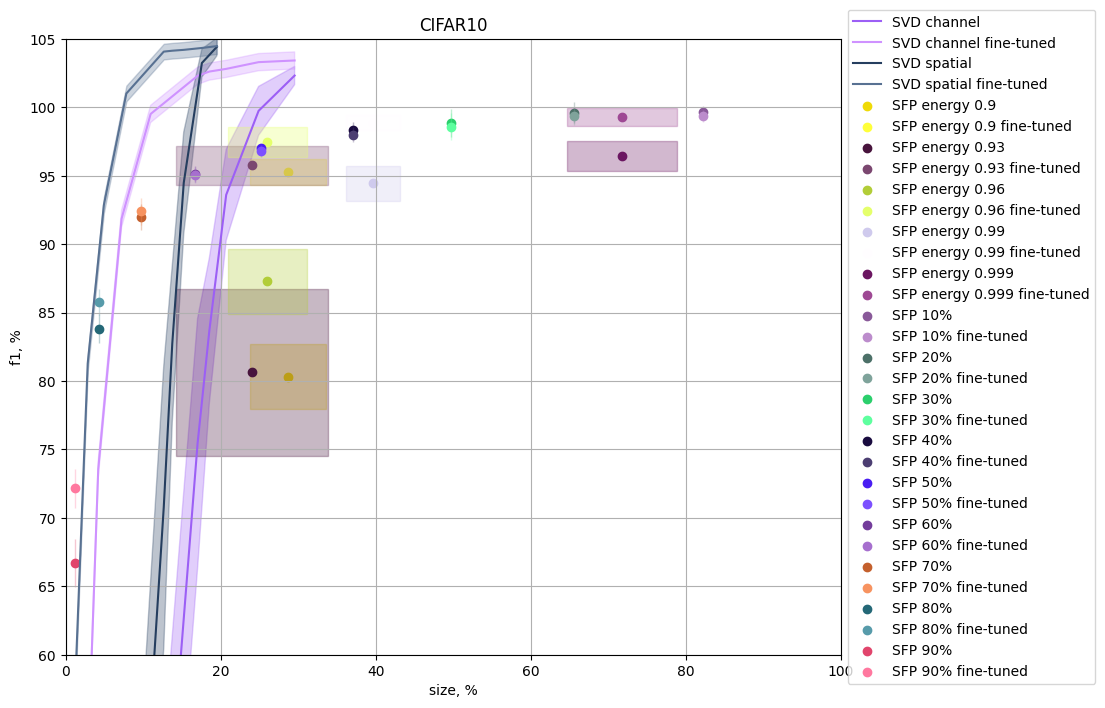

In [18]:
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([sfp_energy, sfp_per]),
    svd_exps={
        'SVD channel': best_channel,
        'SVD spatial': best_spatial,
    },
    figsize=(10, 8),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(60, 105),
    xlim=(0, 100)
)

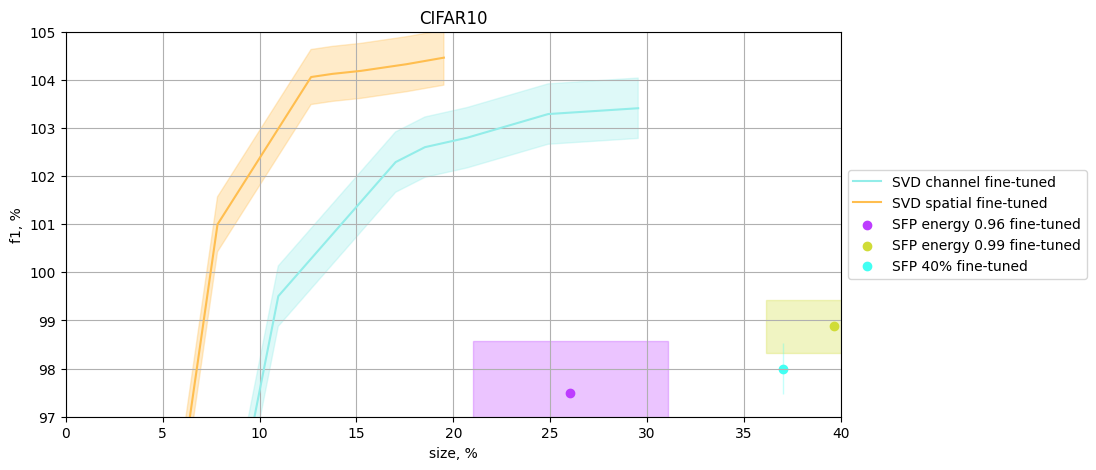

In [21]:
max_size = 40
min_f1 = 97
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([
        sfp_energy.loc[sfp_energy['size']<max_size].loc[sfp_energy['fine-tuned']>min_f1],
        sfp_per.loc[sfp_per['size']<max_size].loc[sfp_per['fine-tuned']>min_f1]
    ])[['size', 'size std', 'fine-tuned', 'fine-tuned std']],
    svd_exps={
        'SVD channel': best_channel[['size', 'fine-tuned', 'fine-tuned std']],
        'SVD spatial': best_spatial[['size', 'fine-tuned', 'fine-tuned std']],
    },
    figsize=(10, 5),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(min_f1, 105),
    xlim=(0, max_size)
)

In [22]:
results = {}
for percent in [100, 99, 97]:
    for phase in ['pruned', 'fine-tuned']:
        results[f'{percent}% {phase}'] = {}
        for k, v in compare_dict.items():
            tmp = v.loc[v[phase]>=percent]['size']
            results[f'{percent}% {phase}'][k] = f"{tmp.min():.0f} ({tmp.idxmin() if len(tmp)>0 else ''})"
results = pd.DataFrame(results).T
results

,SFP percentage,SFP energy,SVD channel,SVD spatial
100% pruned,nan (),nan (),30 (e_0.999),18 (e_0.99)
100% fine-tuned,nan (),nan (),17 (e_0.9),8 (e_0.7)
99% pruned,66 (SFP 20%),nan (),25 (e_0.99),18 (e_0.99)
99% fine-tuned,66 (SFP 20%),72 (SFP energy 0.999),11 (e_0.7),8 (e_0.7)
97% pruned,37 (SFP 40%),nan (),25 (e_0.99),18 (e_0.99)
97% fine-tuned,37 (SFP 40%),26 (SFP energy 0.96),11 (e_0.7),8 (e_0.7)


## FLOP

In [ ]:
from experiments.classificaion.simple_conv_net import load_simple_conv_net

compare_df = compare_inference(
    dataset_name=ds_name,
    exps=exps,
    percent=97,
    compare_dict=compare_dict,
    best_svd=best_svd,
    sfp_load_fn=load_simple_conv_net
)
compare_df

In [11]:
compare_df.iloc[:, 4:]

,"size, %","flop, %","time, %","f1, %"
Baseline,100.000000,100.000000,100.000000,100.000000
SVD channel one_layer,11.193282,100.650364,101.322902,90.535847
SVD channel two_layers,11.193282,24.656845,104.872683,90.536225
SVD channel three_layers,11.193282,25.181620,103.863898,90.536795
SVD spatial one_layer,8.062355,101.166880,103.509781,90.062546
SVD spatial two_layers,8.062355,16.264269,104.064613,90.064228
SVD spatial three_layers,8.062355,16.698379,104.087268,90.061905
SFP percentage,65.629625,68.323245,100.072304,99.665500
SFP energy,71.788958,64.514964,98.984687,96.994595


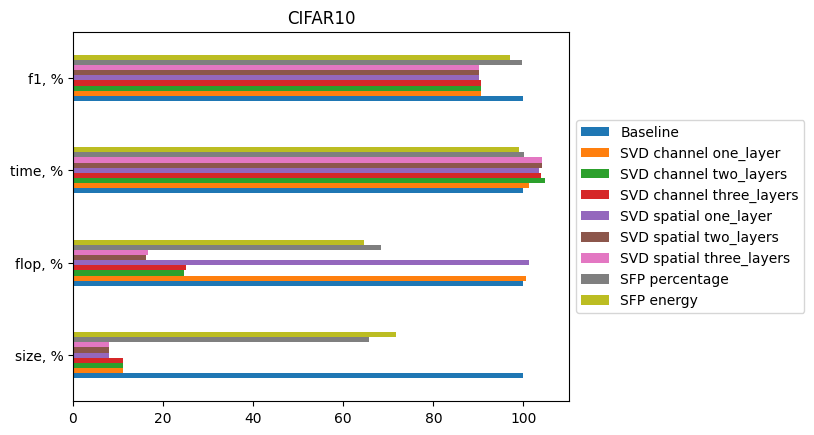

In [13]:
compare_df.iloc[:, 4:].T.plot(kind='barh', title=ds_name).legend(loc='center left', bbox_to_anchor=(1, 0.5));

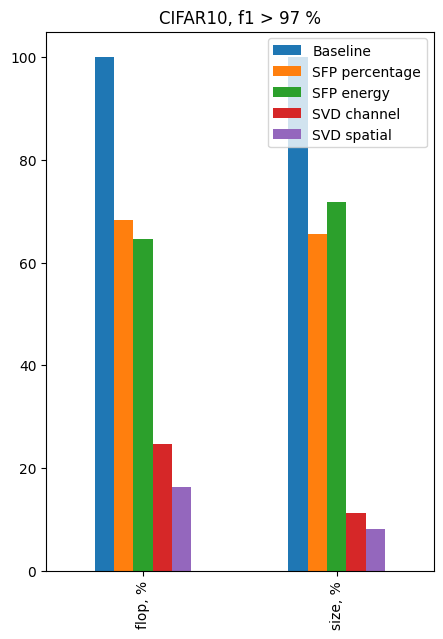

In [15]:
final_compare_df = compare_df.loc[['Baseline', 'SFP percentage', 'SFP energy'], ['flop, %', 'size, %']]
final_compare_df.loc['SVD channel', :] =  compare_df.loc['SVD channel two_layers', ['flop, %', 'size, %']]
final_compare_df.loc['SVD spatial', :] =  compare_df.loc['SVD spatial two_layers', ['flop, %', 'size, %']]
final_compare_df.T.plot(kind='bar', title=f'{ds_name}, f1 > 97 %', figsize=(5, 7));